In [1]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 4
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 4\nProblem 1\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape
breast_input = pd.DataFrame(breast_data)

In [4]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data, labels],axis=1)

In [5]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
x = breast_dataset[features]
Y = breast_dataset['label']

In [7]:
#min max scaler is better
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [8]:
accuracy_history = list()
precision_history = list()
recall_history = list()
for pca_num in range(1, 31):
    pca = PCA(n_components=pca_num)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)
    
    classifier = SVC(random_state=7, C=10, kernel="rbf")
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    accuracy_history.append(metrics.accuracy_score(Y_test, Y_pred))
    precision_history.append(metrics.precision_score(Y_test, Y_pred))
    recall_history.append(metrics.recall_score(Y_test, Y_pred))

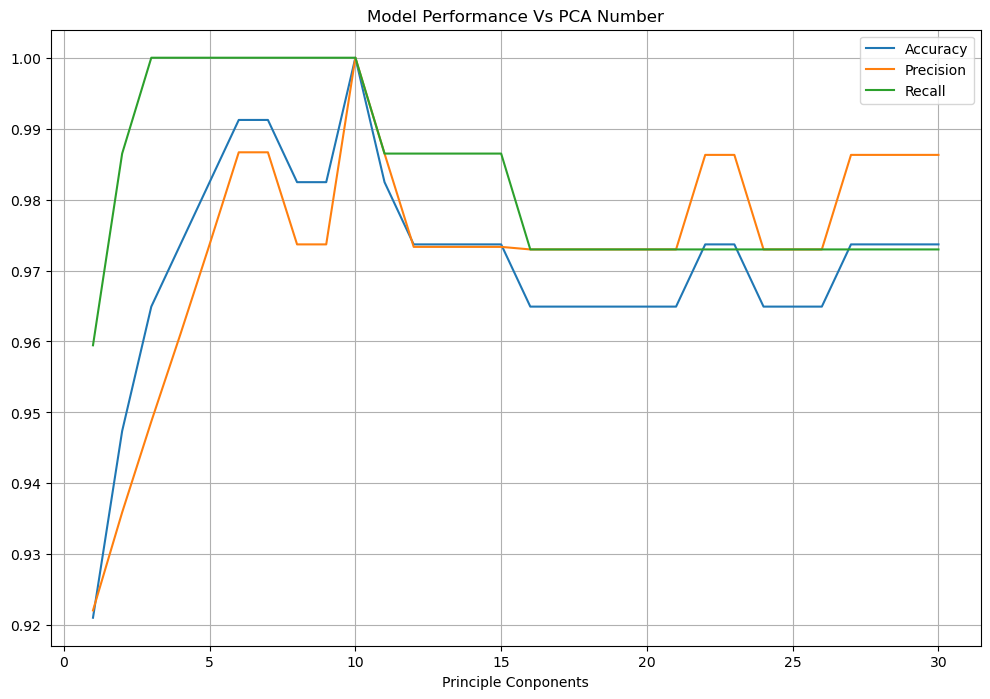

In [9]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(range(1, 31), accuracy_history, label="Accuracy")
plt.plot(range(1, 31), precision_history, label="Precision")
plt.plot(range(1, 31), recall_history, label="Recall")
plt.xlabel("Principle Conponents")
plt.title("Model Performance Vs PCA Number")
plt.legend()
plt.grid()
plt.show()

In [10]:
#pca_num=10 is the optimal number of components, so now we can evaluate the model with 10 components
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)

classifier = SVC(random_state=7, C=10, kernel="rbf")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [11]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
plt.rcParams["figure.figsize"] = (12,8)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[40  0]
 [ 0 74]]


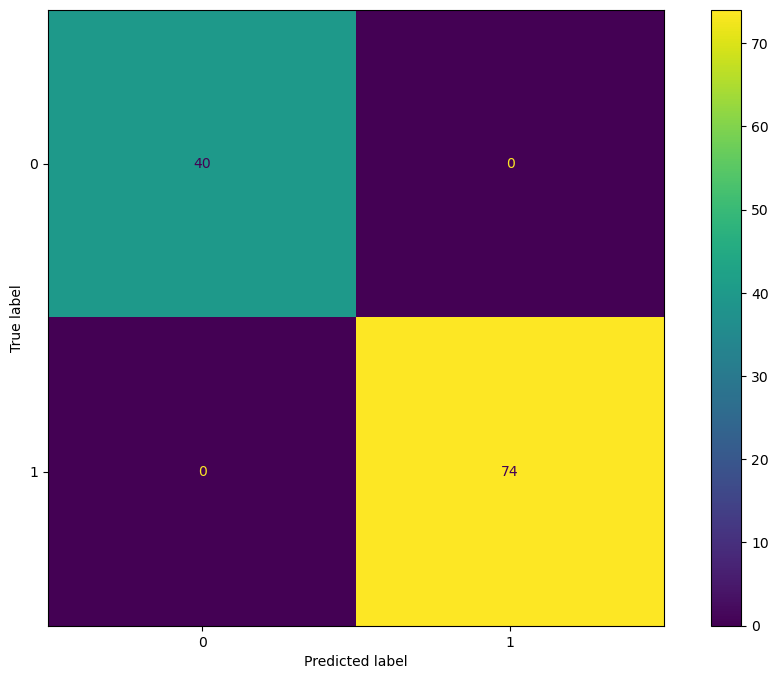

In [12]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(Y_test, Y_pred), display_labels=[0, 1])
cm_display.plot()